In [1]:
import pandas as pd

In [2]:
from IPython.core.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
display(HTML("<style>.container { width:85% !important; }</style>"))

# Условие:

### Гипотеза - новая модель рекомендаций повышает продажи продуктов `deposit_4` и `insurance`.

### Дата проведения AB-теста: с 2021-02-24 по 2021-03-12

* `group_type=’tg’` - у кого новая рекомендательная система; 
* `group_type=‘cg’` - у кого рекомендации оставили без изменений.

# Задача:

1) Рассчитать результаты ab-теста, сделать репрезентативные визуализации (python, excel, power bi - любой удобный тебе) + таблички и вывод о том, подтвердилась ли гипотеза + пояснить вывод.

2) Представь что паркеты с данными это таблички в RDBMS и напиши sql-запрос, который покажет % изменения конверсии по продуктам `deposit_4` и `insurance` между `cg` и `tg` на период теста + используй оператор with, для читаемости.

# Данные:

### Таблицы:

1. **сlients** – список клиентов:
* `client_id` - id клиента
* `group_type` – к какой группе относится (tg-целевая, cg-тестовая)
2. **shows** – показы продуктов клиентам:
* `calday` – дата показа
* `product_id` – какой продукт показали
3. **sales** – продажи продуктов:
* `calday` – дата продажи
* `product_id` – какой продукт продали
4. **products** – каталог продуктов:
* `id` – id продукта
* `product_name` – наименование продукта

### Схема данных:

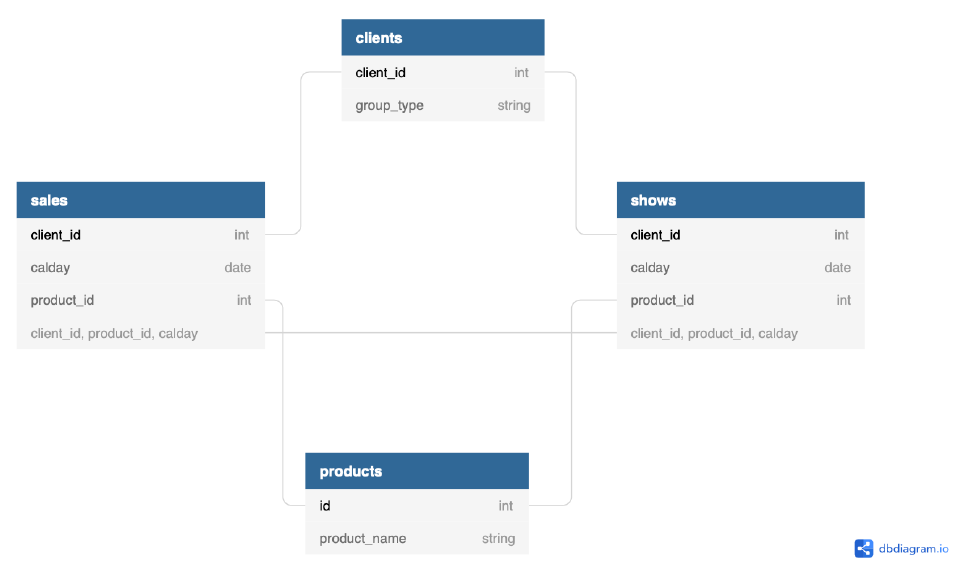

In [3]:
clients = pd.read_parquet('clients.parquet')
shows = pd.read_parquet('shows.parquet')
sales = pd.read_parquet('sales.parquet')
products = pd.read_parquet('products.parquet')

sales.calday = pd.to_datetime(sales.calday)

In [4]:
sales = (clients.merge(sales, how='right')) \
    .merge(products, how='left', left_on = 'product_id', right_on='id')

shows = (clients.merge(shows, how='right')) \
    .merge(products, how='left', left_on = 'product_id', right_on='id')

In [5]:
sales_before_ab = sales.loc[(sales.calday < '2021-02-24') & ((sales.product_name == 'deposit_4') | (sales.product_name == 'insurance'))]
shows_before_ab = shows.loc[(shows.calday < '2021-02-24') & ((shows.product_name == 'deposit_4') | (shows.product_name == 'insurance'))]

sales_ab = sales.loc[(sales.calday >= '2021-02-24') & (sales.calday <= '2021-03-12') & \
                    ((sales.product_name == 'deposit_4') | (sales.product_name == 'insurance'))]
shows_ab = shows.loc[(shows.calday >= '2021-02-24') & (shows.calday <= '2021-03-12') & \
                    ((shows.product_name == 'deposit_4') | (shows.product_name == 'insurance'))]

In [6]:
conversion_before_ab = round(sales_before_ab.shape[0] / shows_before_ab.shape[0] * 100, 2)
conversion_ab = round(sales_ab.shape[0] / shows_ab.shape[0] * 100, 2)

In [7]:
conversion_before_ab
conversion_ab

16.83

13.71

In [8]:
sales_ab.groupby('client_id') \
    .agg({'group_type': 'max'}) \
    .group_type.value_counts()

tg    2036
cg    1822
Name: group_type, dtype: int64

In [9]:
sales_before_ab.shape[0]
sales_ab.shape[0]

shows_before_ab.shape[0]
shows_ab.shape[0]

3156

3869

18757

28220